In [642]:
import matplotlib as mpl
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [643]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [644]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [645]:
train.shape

(891, 12)

In [646]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Here, we create a bar char to have a general outlook the survival of people based on Sec ,Pclass, SibSp, Parch and Embarked

In [647]:
def bar_chart(feature):
    survived = train[train['Survived']== 1][feature].value_counts()
    dead = train[train['Survived'] == 0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar', stacked=True,figsize=(10,5))

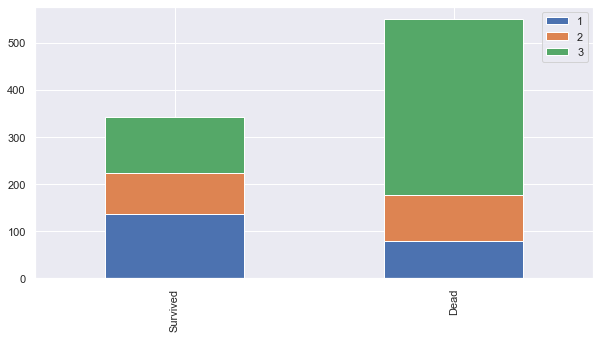

In [648]:
bar_chart('Pclass')

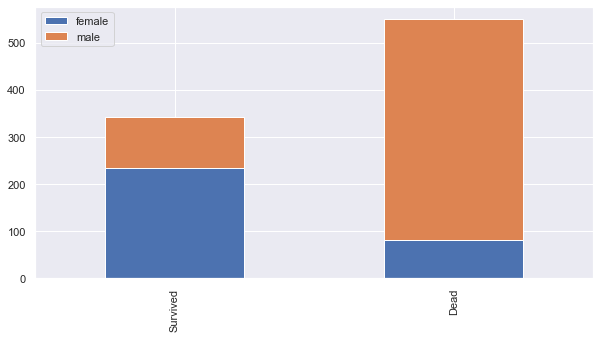

In [649]:
bar_chart('Sex')

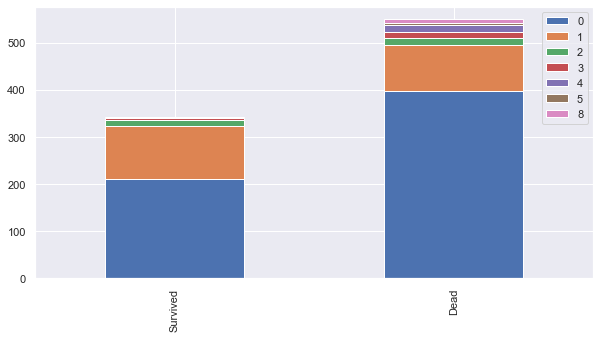

In [650]:
bar_chart('SibSp')

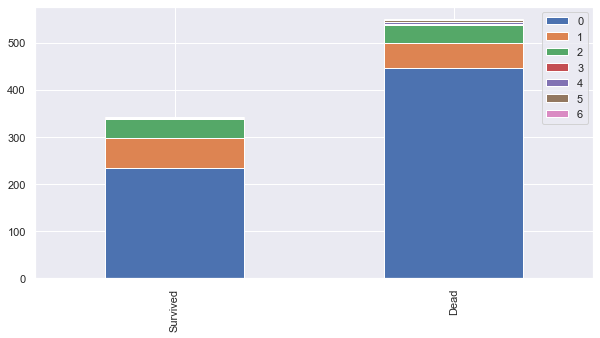

In [651]:
bar_chart('Parch')

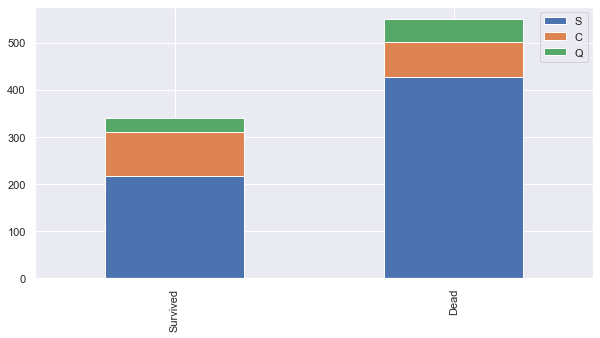

In [652]:
bar_chart('Embarked')

### Data Cleaning and Processing

In [653]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Cabin column is missing large volume of data, we decide to drop it. Also, the ticket information is not very useful for the analysis, we also remove the ticket column.

In [654]:
train = train.drop(['Cabin', 'Ticket'], axis = 1)
test = test.drop(['Cabin', 'Ticket'], axis = 1)

#### 2 columns are removed

In [655]:
train.shape

(891, 10)

In [656]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


#### fill the missing Age, we need to combine the train.csv and test.csv to find the median age, also, groupby with people's title

In [657]:
train_test_data = [train, test] 

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.', expand=False)

In [658]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Lady          1
Don           1
Sir           1
Ms            1
Countess      1
Capt          1
Jonkheer      1
Mme           1
Name: Title, dtype: int64

In [659]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dona        1
Dr          1
Name: Title, dtype: int64

In [660]:
title_mapping = {"Mr":0, "Miss": 1, "Mrs": 2, 
                "Master":3, "Dr": 3, "Rev": 3, "Col": 3, "Major":3, "Mile":3, "Countess":3,
                "Ms":3, "Lady":3, "Jonkheer": 3, "Don": 3, "Dona": 3, "Mme": 3, "Capt": 4, "Sir": 3}

for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [661]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0.0


In [662]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,2


### Also, name is very important for the data analysis, so we remove the Name column

In [663]:
train.drop('Name', axis = 1, inplace=True)
test.drop('Name', axis = 1, inplace=True)

In [664]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,male,22.0,1,0,7.2500,S,0.0
1,2,1,1,female,38.0,1,0,71.2833,C,2.0
2,3,1,3,female,26.0,0,0,7.9250,S,1.0
3,4,1,1,female,35.0,1,0,53.1000,S,2.0
4,5,0,3,male,35.0,0,0,8.0500,S,0.0


In [665]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,male,34.5,0,0,7.8292,Q,0
1,893,3,female,47.0,1,0,7.0000,S,2
2,894,2,male,62.0,0,0,9.6875,Q,0
3,895,3,male,27.0,0,0,8.6625,S,0
4,896,3,female,22.0,1,1,12.2875,S,2


In [666]:
sex_mapping = {"male": 0, "female": 1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

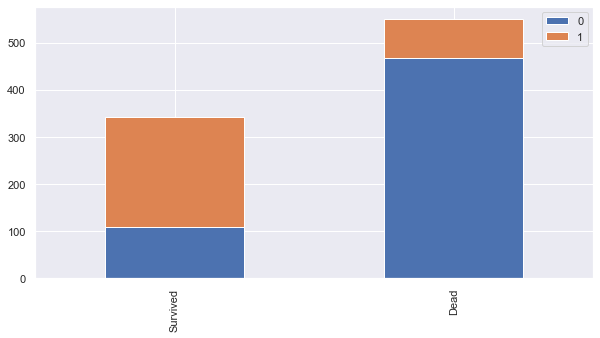

In [667]:
# 0 is male, 1 is female in the combined train_test_data
bar_chart('Sex')

<Figure size 2160x1440 with 0 Axes>

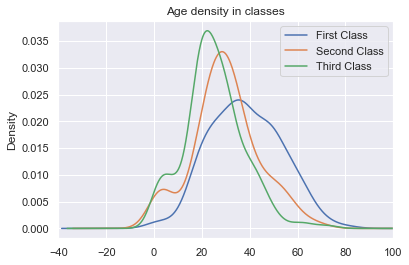

<Figure size 2160x1440 with 0 Axes>

In [668]:
# The KDE Plot for train data
for x in [1,2,3]: 
    train.Age[train.Pclass == x].plot(kind="kde")
plt.title("Age density in classes")
plt.legend(("First Class","Second Class","Third Class"))
plt.xlim(-40, 100)
plt.figure(figsize=(30,20))

In [669]:
train.head(30)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,0,22.0,1,0,7.2500,S,0.0
1,2,1,1,1,38.0,1,0,71.2833,C,2.0
2,3,1,3,1,26.0,0,0,7.9250,S,1.0
3,4,1,1,1,35.0,1,0,53.1000,S,2.0
4,5,0,3,0,35.0,0,0,8.0500,S,0.0
5,6,0,3,0,NaN,0,0,8.4583,Q,0.0
6,7,0,1,0,54.0,0,0,51.8625,S,0.0
7,8,0,3,0,2.0,3,1,21.0750,S,3.0
8,9,1,3,1,27.0,0,2,11.1333,S,2.0
9,10,1,2,1,14.0,1,0,30.0708,C,2.0


### Since the Age still has missing data now we are going to fill missing age with median age for each title (Mr, Mrs, Miss, Others)

In [670]:
train["Age"].fillna(train.groupby('Title')["Age"].transform("median"), inplace=True)
test["Age"].fillna(train.groupby('Title')["Age"].transform("median"), inplace=True)

In [671]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       889 non-null object
Title          889 non-null float64
dtypes: float64(3), int64(6), object(1)
memory usage: 69.7+ KB


In [672]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           417 non-null float64
Embarked       418 non-null object
Title          418 non-null int64
dtypes: float64(2), int64(6), object(1)
memory usage: 29.5+ KB


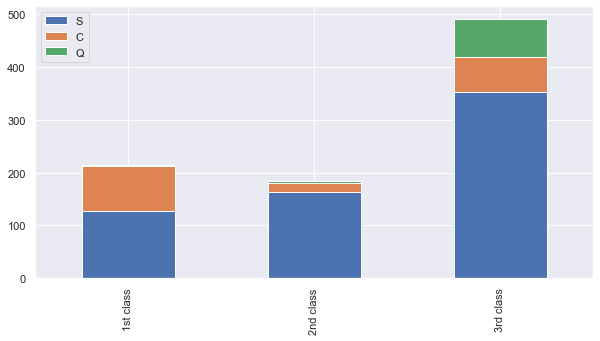

In [673]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind='bar', stacked=True, figsize=(10, 5))

### Since more than 70% passager boared in Southampton, we can fill with this city

In [674]:
train.Embarked.fillna(train.Embarked.mode()[0], inplace = True)

In [675]:
#fill missing Fare with median fare for each Pclass
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace = True)
test["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace = True)

In [676]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       891 non-null object
Title          889 non-null float64
dtypes: float64(3), int64(6), object(1)
memory usage: 69.7+ KB


In [677]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
Embarked       418 non-null object
Title          418 non-null int64
dtypes: float64(2), int64(6), object(1)
memory usage: 29.5+ KB


In [678]:
#Statistic summary after cleaning
train.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,889.000000
mean,446.000000,0.383838,2.308642,0.352413,29.372806,0.523008,0.381594,32.204208,0.706412
std,257.353842,0.486592,0.836071,0.477990,13.227346,1.102743,0.806057,49.693429,0.967008
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,21.000000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,0.000000,30.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,4.000000


In [679]:
train.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.037826,-0.057527,-0.001652,0.012658,-0.005992
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.076083,-0.035322,0.081629,0.257307,0.440232
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.348490,0.083081,0.018443,-0.549500,-0.158597
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.104150,0.114631,0.245489,0.182333,0.552596
Age,0.037826,-0.076083,-0.348490,-0.104150,1.000000,-0.260233,-0.185141,0.097720,-0.150734
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.260233,1.000000,0.414838,0.159651,0.291016
Parch,-0.001652,0.081629,0.018443,0.245489,-0.185141,0.414838,1.000000,0.216225,0.346176
Fare,0.012658,0.257307,-0.549500,0.182333,0.097720,0.159651,0.216225,1.000000,0.143243
Title,-0.005992,0.440232,-0.158597,0.552596,-0.150734,0.291016,0.346176,0.143243,1.000000


### The Age values were filled by adding median of all passagers. Cabin, Name, and Ticket columns were removed. There is still two title data are missing, but we can ignore it. It would not has a large effect on our processed data.

### Data visualization and analysis of some cleaning data

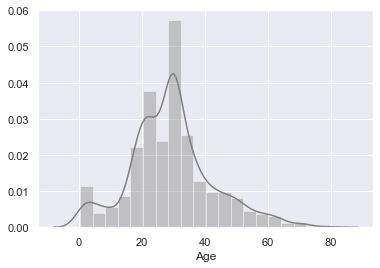

In [680]:
# Age Distribution with Seaborn for train data
sns.distplot(train['Age'].dropna(),color='grey',bins=20)

In [681]:
pd.DataFrame(train.Age.describe())

,Age
count,891.000000
mean,29.372806
std,13.227346
min,0.420000
25%,21.000000
50%,30.000000
75%,35.000000
max,80.000000


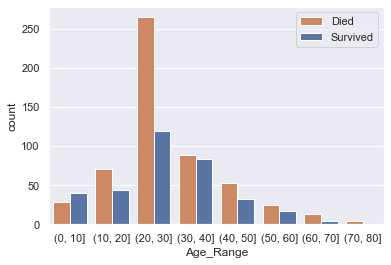

In [682]:
train['Age_Range'] = pd.cut(train.Age, [0, 10, 20, 30, 40, 50, 60,70,80])
sns.countplot(x = "Age_Range", hue = "Survived", data = train, \
              palette=["C1", "C0"]).legend(labels = ["Died", "Survived"])

In [683]:
# Accumulative Bar chart by Dividing train and test Age data in to 5 ranges
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3,
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

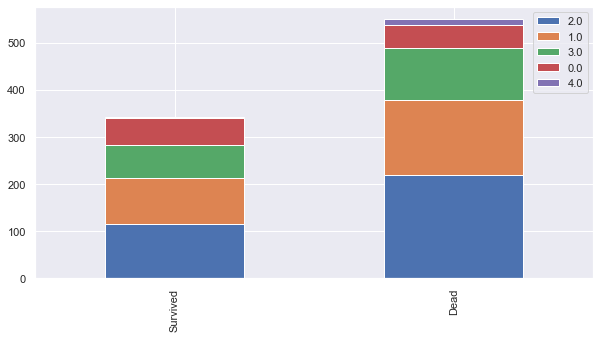

In [684]:
bar_chart('Age')

#### * Age distribution analysis results show that passagers age were betwen age 0 to 80. The average age range were below 30. Also, people who less than age 10 had the highest survived rate compare to all other age range.  

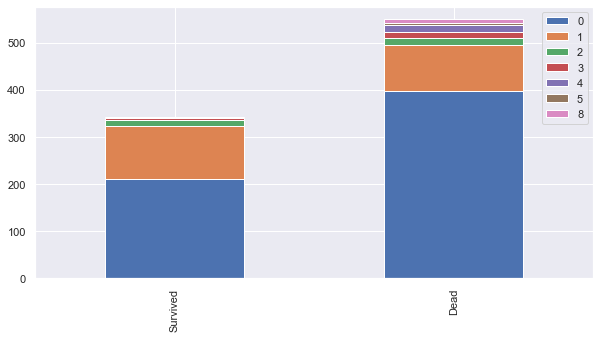

In [685]:
bar_chart('SibSp')

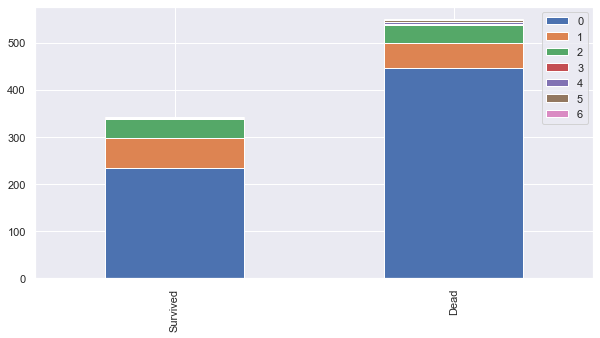

In [686]:
bar_chart('Parch')

#### * Both SibSp and Parch data show passager travelled alone had chance to survive

### Prediction
#### Methods refer to Kris's Ttanic Notes.

In [687]:
#Drop columns, only ID and survived column remain
train.drop(['Embarked', 'Age_Range'], axis=1, inplace=True)
#'SibSp', 'Parch', 'Age'

In [688]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title
0,1,0,3,0,1.0,1,0,7.2500,0.0
1,2,1,1,1,3.0,1,0,71.2833,2.0
2,3,1,3,1,1.0,0,0,7.9250,1.0
3,4,1,1,1,2.0,1,0,53.1000,2.0
4,5,0,3,0,2.0,0,0,8.0500,0.0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,2.0,0,0,13.0000,3.0
887,888,1,1,1,1.0,0,0,30.0000,1.0
888,889,0,3,1,1.0,1,2,23.4500,1.0
889,890,1,1,0,1.0,0,0,30.0000,0.0


In [689]:
# Data to be predicted
X_to_be_predicted = train[train.Survived.isnull()]
X_to_be_predicted = X_to_be_predicted.drop(['Survived'], axis = 1)

#Training data
train_data = train
train_data = train_data.dropna()
feature_train = train_data['Survived']
label_train  = train_data.drop(['Survived'], axis = 1)
train_data.shape

(889, 9)



NaiveBayes Accuracy: 79.78%
The cross validated score for Gaussian Naive Bayes is: 80.62


Text(0.5, 1.05, 'Confusion_matrix for NB')

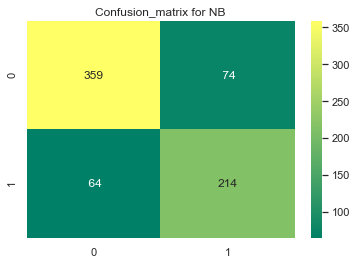

In [690]:
##Gaussian
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBClassifier

clf = GaussianNB()
x_train, x_test, y_train, y_test = train_test_split(label_train, feature_train, test_size=0.2)
clf.fit(x_train,  np.ravel(y_train))
print("\n\nNaiveBayes Accuracy: "+repr(round(clf.score(x_test, y_test) * 100, 2)) + "%")
result_rf=cross_val_score(clf,x_train,y_train,cv=10,scoring='accuracy')
print('The cross validated score for Gaussian Naive Bayes is:',round(result_rf.mean()*100,2))
y_pred = cross_val_predict(clf,x_train,y_train,cv=10)
sns.heatmap(confusion_matrix(y_train,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix for NB', y=1.05, size=12)

RF Accuracy: 82.58%
The cross validated score for Random forest is: 82.29


Text(0.5, 1.05, 'Confusion_matrix for RF')

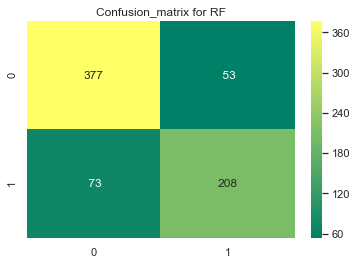

In [691]:
##Random forest
clf = RandomForestClassifier(criterion='entropy', 
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
x_train, x_test, y_train, y_test = train_test_split(label_train, feature_train, test_size=0.2)
clf.fit(x_train,  np.ravel(y_train))
print("RF Accuracy: "+repr(round(clf.score(x_test, y_test) * 100, 2)) + "%")

result_rf=cross_val_score(clf,x_train,y_train,cv=10,scoring='accuracy')
print('The cross validated score for Random forest is:',round(result_rf.mean()*100,2))
y_pred = cross_val_predict(clf,x_train,y_train,cv=10)
sns.heatmap(confusion_matrix(y_train,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix for RF', y=1.05, size=12)

### Based on two different prediction methods, the random forest shows higher cross validated score

##### The last prediction data could not export due to  "Found array with 0 sample(s) while a minimum of 1 is required". I will try to fix it later. This is a great project for data cleaning and prediction. I got a whole picture how data scientist/data engineer manipulate large dataset.